In [1]:
import numpy as np
import pandas as pd
import matplotlib as apl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

In [2]:
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
features=pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
features[['AGE']]

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
...,...
501,69.1
502,76.7
503,91.0
504,89.3


In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
target=pd.DataFrame(boston.target,columns=['Target'])
target

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [9]:
max(target['Target'])

50.0

In [10]:
min(target['Target'])

5.0

In [11]:
#features['Target']=boston.target-----alternative way to add column is to concat

In [12]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [13]:
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
df.describe()
#.loc[[]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.describe().round(decimals=2)#data visualization

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [16]:
corr=df.corr('pearson')
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [17]:
list(features)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [18]:
corr['CRIM']['Target']

-0.3883046085868114

In [19]:
corr=df.corr('pearson')
corrs=[abs(corr[attr]['Target']) for attr in list(features)]
corrs

[0.3883046085868114,
 0.3604453424505447,
 0.483725160028373,
 0.1752601771902975,
 0.4273207723732817,
 0.6953599470715389,
 0.3769545650045959,
 0.24992873408590394,
 0.3816262306397776,
 0.46853593356776646,
 0.507786685537561,
 0.33346081965706653,
 0.7376627261740143]

In [20]:
l=list(zip(corrs,list(features)))
l

[(0.3883046085868114, 'CRIM'),
 (0.3604453424505447, 'ZN'),
 (0.483725160028373, 'INDUS'),
 (0.1752601771902975, 'CHAS'),
 (0.4273207723732817, 'NOX'),
 (0.6953599470715389, 'RM'),
 (0.3769545650045959, 'AGE'),
 (0.24992873408590394, 'DIS'),
 (0.3816262306397776, 'RAD'),
 (0.46853593356776646, 'TAX'),
 (0.507786685537561, 'PTRATIO'),
 (0.33346081965706653, 'B'),
 (0.7376627261740143, 'LSTAT')]

In [21]:
l.sort(key=lambda x:x[0],reverse=True)#sort according to key because of--
l                                     #which lambda function is used

[(0.7376627261740143, 'LSTAT'),
 (0.6953599470715389, 'RM'),
 (0.507786685537561, 'PTRATIO'),
 (0.483725160028373, 'INDUS'),
 (0.46853593356776646, 'TAX'),
 (0.4273207723732817, 'NOX'),
 (0.3883046085868114, 'CRIM'),
 (0.3816262306397776, 'RAD'),
 (0.3769545650045959, 'AGE'),
 (0.3604453424505447, 'ZN'),
 (0.33346081965706653, 'B'),
 (0.24992873408590394, 'DIS'),
 (0.1752601771902975, 'CHAS')]

In [22]:
corrs,labels=list(zip(*l))#unzip the zipped list
labels

('LSTAT',
 'RM',
 'PTRATIO',
 'INDUS',
 'TAX',
 'NOX',
 'CRIM',
 'RAD',
 'AGE',
 'ZN',
 'B',
 'DIS',
 'CHAS')

In [23]:
index=np.arange(len(labels))#for values in x axis as we are to plot graph for each column

In [24]:
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

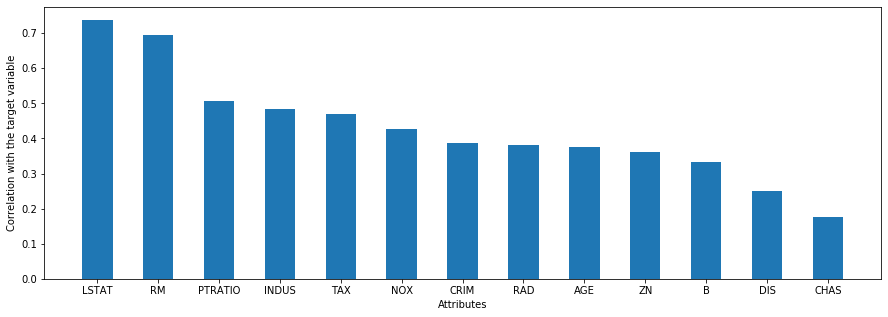

In [25]:
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index,labels)
plt.show()

In [26]:
#so most correlation is for LSTAT and so LSTAT is taken as the independent variable

In [27]:
                     #################################



                     ######Normalization of Data######



                     #################################

In [28]:
#now with independent variable prepare the data for the linear regression algorithm


#ie X has LSTAT column values

# Y has Target column values

#perform normalization on selected columns
#goal is to change the value so that it lies in a common scale
#here it is between 0 and 1
#each column has different values
#we are to bring it to common scale by normalization
#should make sure the proportion or difference between is not changed


In [29]:
X=df['LSTAT'].values
Y=df['Target'].values
print(X)

[ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1  20.45 13.27
 15.71  8.26 10.26  8.47  6.58 14.67 11.69 11.28 21.02 13.83 18.72 19.88
 16.3  16.51 14.81 17.28 12.8  11.98 22.6  13.04 27.71 18.35 20.34  9.68
 11.41  8.77 10.13  4.32  1.98  4.84  5.81  7.44  9.55 10.21 14.15 18.8
 30.81 16.2  13.45  9.43  5.28  8.43 14.8   4.81  5.77  3.95  6.86  9.22
 13.15 14.44  6.73  9.5   8.05  4.67 10.24  8.1  13.09  8.79  6.72  9.88
  5.52  7.54  6.78  8.94 11.97 10.27 12.34  9.1   5.29  7.22  6.72  7.51
  9.62  6.53 12.86  8.44  5.5   5.7   8.81  8.2   8.16  6.21 10.59  6.65
 11.34  4.21  3.57  6.19  9.42  7.67 10.63 13.44 12.33 16.47 18.66 14.09
 12.27 15.55 13.   10.16 16.21 17.09 10.45 15.76 12.04 10.3  15.37 13.61
 14.37 14.27 17.93 25.41 17.58 14.81 27.26 17.19 15.39 18.34 12.6  12.26
 11.12 15.03 17.31 16.96 16.9  14.59 21.32 18.46 24.16 34.41 26.82 26.42
 29.29 27.8  16.65 29.53 28.32 21.45 14.1  13.28 12.12 15.79 15.12 15.02
 16.14  4.59  6.43  7.39  5.5   1.73  1.92  3.32 11.

In [30]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X

array([[0.08967991],
       [0.2044702 ],
       [0.06346578],
       [0.03338852],
       [0.09933775],
       [0.09602649],
       [0.29525386],
       [0.48068433],
       [0.7781457 ],
       [0.424117  ],
       [0.51655629],
       [0.31843267],
       [0.38576159],
       [0.18018764],
       [0.23537528],
       [0.18598234],
       [0.13383002],
       [0.35706402],
       [0.27483444],
       [0.26352097],
       [0.53228477],
       [0.33388521],
       [0.46881898],
       [0.50082781],
       [0.40204194],
       [0.40783664],
       [0.36092715],
       [0.42908389],
       [0.30546358],
       [0.28283664],
       [0.575883  ],
       [0.31208609],
       [0.71688742],
       [0.45860927],
       [0.51352097],
       [0.21937086],
       [0.26710817],
       [0.19426049],
       [0.23178808],
       [0.07146799],
       [0.00689845],
       [0.08581678],
       [0.11258278],
       [0.15756071],
       [0.21578366],
       [0.23399558],
       [0.34271523],
       [0.471

In [31]:
X=X[:,-1]
X

array([0.08967991, 0.2044702 , 0.06346578, 0.03338852, 0.09933775,
       0.09602649, 0.29525386, 0.48068433, 0.7781457 , 0.424117  ,
       0.51655629, 0.31843267, 0.38576159, 0.18018764, 0.23537528,
       0.18598234, 0.13383002, 0.35706402, 0.27483444, 0.26352097,
       0.53228477, 0.33388521, 0.46881898, 0.50082781, 0.40204194,
       0.40783664, 0.36092715, 0.42908389, 0.30546358, 0.28283664,
       0.575883  , 0.31208609, 0.71688742, 0.45860927, 0.51352097,
       0.21937086, 0.26710817, 0.19426049, 0.23178808, 0.07146799,
       0.00689845, 0.08581678, 0.11258278, 0.15756071, 0.21578366,
       0.23399558, 0.34271523, 0.47102649, 0.80242826, 0.39928256,
       0.32339956, 0.21247241, 0.09795806, 0.18487859, 0.36065121,
       0.08498896, 0.11147903, 0.06125828, 0.14155629, 0.2066777 ,
       0.31512141, 0.35071744, 0.13796909, 0.21440397, 0.17439294,
       0.08112583, 0.2348234 , 0.17577263, 0.31346578, 0.19481236,
       0.13769316, 0.22488962, 0.10458057, 0.16032009, 0.13934

In [32]:
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]
Y

array([0.42222222, 0.36888889, 0.66      , 0.63111111, 0.69333333,
       0.52666667, 0.39777778, 0.49111111, 0.25555556, 0.30888889,
       0.22222222, 0.30888889, 0.37111111, 0.34222222, 0.29333333,
       0.33111111, 0.40222222, 0.27777778, 0.33777778, 0.29333333,
       0.19111111, 0.32444444, 0.22666667, 0.21111111, 0.23555556,
       0.19777778, 0.25777778, 0.21777778, 0.29777778, 0.35555556,
       0.17111111, 0.21111111, 0.18222222, 0.18      , 0.18888889,
       0.30888889, 0.33333333, 0.35555556, 0.43777778, 0.57333333,
       0.66444444, 0.48      , 0.45111111, 0.43777778, 0.36      ,
       0.31777778, 0.33333333, 0.25777778, 0.20888889, 0.32      ,
       0.32666667, 0.34444444, 0.44444444, 0.40888889, 0.30888889,
       0.67555556, 0.43777778, 0.59111111, 0.40666667, 0.32444444,
       0.30444444, 0.24444444, 0.38222222, 0.44444444, 0.62222222,
       0.41111111, 0.32      , 0.37777778, 0.27555556, 0.35333333,
       0.42666667, 0.37111111, 0.39555556, 0.40888889, 0.42444

In [33]:
#Now values are in range of 0 and 1
#Normalization has been successful

In [34]:
#now error reduction
def error(m,x,c,t):
    N=x.size
    return sum(((m*x+c)-t)**2)/(2*N)

In [35]:
#splitting the dataset for training
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [36]:
def update(m,x,c,t,learning_rate):
    grad_m=sum(2*((m*x+c)-t)*x) 
    grad_c=sum(2*((m*x+c)-t))
    m=m-grad_m*learning_rate
    c=c-grad_c*learning_rate
    return m,c

In [37]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values=list()
    for i in range(iterations):
        e=error(m,x,c,t)
        if e<error(m,x,c,t):
            print("Error less than the threshold. Stopping gradient descent")
            break
        error_values.append(e)
        m,c=update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

In [38]:
#Y

In [39]:
#X

In [40]:
#xtrain

In [41]:
#xtest

In [42]:
#ytest

In [43]:
#ytrain

In [44]:
%%time
init_m=0.9
init_c=0
learning_rate=0.001
iterations=250
error_threshold=0.001
m,c,error_values,mc_values=gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)


Wall time: 92.8 ms


In [45]:
m

-0.7579541133694816

In [46]:
c

0.6195007421517388

In [47]:
error_values

[0.06995642548867033,
 0.06184107656702617,
 0.0588363226838756,
 0.05606309147877874,
 0.053446856039544875,
 0.05097795239558829,
 0.04864807324196123,
 0.04644938994070756,
 0.044374514831398766,
 0.042416476255843556,
 0.040568695131012196,
 0.03882496284304398,
 0.037179420386071214,
 0.03562653867573992,
 0.034161099971279106,
 0.03277818034369616,
 0.03147313313119067,
 0.030241573326196716,
 0.029079362841593022,
 0.027982596606575053,
 0.02694758944547047,
 0.025970863695411184,
 0.02504913752125524,
 0.024179313888497915,
 0.02335847015711976,
 0.022583848261406293,
 0.021852845442743983,
 0.021163005504253644,
 0.020512010557876867,
 0.019897673236185184,
 0.019317929342743543,
 0.018770830916332852,
 0.01825453968572728,
 0.017767320893033976,
 0.017307537464841587,
 0.016873644511592047,
 0.01646418413669393,
 0.016077780537935123,
 0.01571313538473586,
 0.01536902345570924,
 0.015044288521871499,
 0.014737839461669218,
 0.014448646594769996,
 0.014175738222297968,
 0.0139

In [48]:
mc_values

[(0.8772011665271748, 0.09631844370860927),
 (0.8333077315252436, 0.12037048656611227),
 (0.7881514512955548, 0.13569074955897373),
 (0.7439937347442636, 0.14964242273130654),
 (0.7010635912739561, 0.16308785291627162),
 (0.6593557610099032, 0.17613677272838152),
 (0.61883878006274, 0.1888115333130632),
 (0.5794790333516481, 0.20112409774007112),
 (0.5412435129886528, 0.21308495908063105),
 (0.5041001130437099, 0.22470418011809282),
 (0.46801763990139594, 0.2359915211015875),
 (0.43296579038244076, 0.24695646174952035),
 (0.39891512679393604, 0.25760821080873586),
 (0.3658370522644311, 0.2679557139732342),
 (0.33370378673402856, 0.2780076614184592),
 (0.3024883436245473, 0.2877724951020713),
 (0.27216450717539165, 0.2972584158540692),
 (0.24270681042670003, 0.30647339026415094),
 (0.21409051383135158, 0.315425157372323),
 (0.18629158447787716, 0.32412123516840236),
 (0.15928667590682624, 0.33256892690587275),
 (0.13305310850363863, 0.34077532723539833),
 (0.10756885045155504, 0.3487473

In [49]:
#animation shwoing the changing regression line and resulting in one

In [50]:
#more iterations means changes in line are less noticeable
#also it takes so much processing time for such big values,so it is advised to choose smaller values
#so slicing is done
mc_values_anim= mc_values[0:250:5]


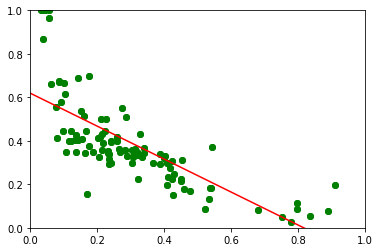

In [51]:
fig,ax=plt.subplots()
ln,=plt.plot([],[],'ro-',animated=True)
#generating animation requires two functions
#one is to initialize the state of graph
def init():
    plt.scatter(xtest,ytest,color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,
#update each frame with new data
#update frame funcition updates the coordinates for the line in each frame
def update_frame(frame):
    m,c=mc_values_anim[frame]
    x1,y1=-0.5,m*-.5+c
    x2,y2=1.5,m*1.5+c                #y=mx+c
    ln.set_data([x1,x2],[y1,y2])     #set two end ponts of line
    return ln,

#func animation
#create object of func animation
anim=FuncAnimation(fig,update_frame,frames=range(len(mc_values_anim)),init_func=init,blit=True)
HTML(anim.to_html5_video())#to display the video in the notebook as HTML video

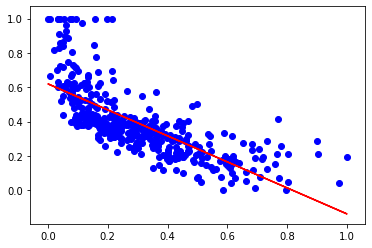

In [52]:
#visualization of learning process
#1.plot regression line
#2.plot error values
#3.plot change in regression line throughout the training process



#plot regression line

plt.scatter(xtrain,ytrain,color='b')
plt.plot(xtrain,m*xtrain+c,color='r')#y=mx+c


Text(0, 0.5, 'Iterations')

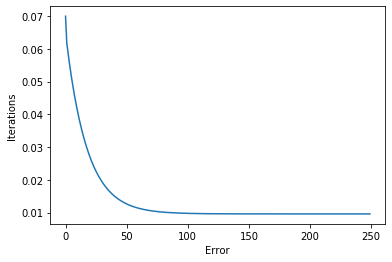

In [53]:
#plot error values
#shows how error values changed as the trainin progressed
plt.plot(np.arange(len(error_values)),error_values)
plt.xlabel('Error')
plt.ylabel('Iterations')

In [54]:
#error value decreasing with iterations
#it can also be understood thay values after a certain limit is almost same
#so it is understood here that even for higher values of iterations it won't create a bg reduction in error values

In [55]:
#last step pf prediction or indeed in other words it is testing
#test how well the model has performed on the data that it has not seen
predicted=m*xtest+c


In [56]:
mean_squared_error(ytest,predicted)

0.018230263452632383

In [57]:
#put xtest,ytest and predicted values into a single dayaframe so that we
#can see the predicted values alongside the testing set
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.201711,0.413333,0.466613
1,0.303532,0.355556,0.389437
2,0.540563,0.184444,0.209779
3,0.327263,0.433333,0.371451
4,0.076435,0.557778,0.561567


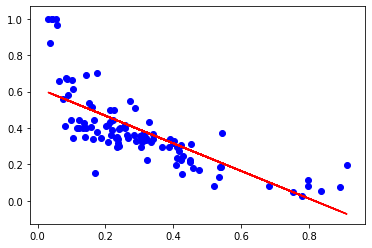

In [58]:
#plot predicted values over the target values
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predicted,color='r')


In [63]:
#predicted

In [60]:
#now we use invere_transform since we nee the predictions in trems of the prices
#as in the original representation of dataset

#reshape to change the shape that is required by the scaler
#scalar requires the data to be in vertical orientation ie one column instead of one row
#and that is done by reshape()
#here it is reshaped from horizontal to vertical by the values -1,1
predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predicted_scaled=y_scaler.inverse_transform(predicted)
#when data gets scaled back it will have an extra dimension, so it is removed by slicing

xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=['x','target_y','predicted_y'])
p=p.round(decimals=2)
p.head()

,x,target_y,predicted_y
0,9.04,23.6,26.00
1,12.73,21.0,22.52
2,21.32,13.3,14.44
3,13.59,24.5,21.72
4,4.50,30.1,30.27


In [64]:
predicted_scaled

array([25.99759395, 22.52468334, 14.44004861, 21.7152787 , 30.27049752,
       29.33874101, 18.96706759, 28.1528691 , 18.40236668, 30.91990357,
       16.61414712, 27.55052146, 23.17408939, 17.53649195, 18.41177836,
       25.54583322, 22.9576207 ,  6.29894379, 29.26344756, 31.38107598,
       23.72937862, 18.25177977, 26.88229204, 28.74580506, 21.94115906,
       28.03992891, 27.08934905, 19.17412459,  4.39778405, 19.59765028,
       24.03996412, 23.5317333 ,  2.48721263, 29.77167838, 28.8775686 ,
       21.85645393, 25.63995004, 20.35999651, 21.48939833, 30.11049893,
       24.67054681, 22.16703943, 22.45880157, 27.25875932, 24.84936876,
       18.600012  , 28.18110414, 31.79518998, 24.82113371, 14.30828506,
       30.71284657,  9.61185581,  5.67777279, 17.5082569 , 25.82818368,
       24.05878748, 28.31286769, 18.35530827, 23.08938425, 23.83290712,
       21.2446946 , 17.23531813, 29.94108865, 21.95057074, 22.34586138,
       15.09886634, 27.17405418, 25.51759817, 29.43285783, 31.57